# Import libraries

In [1]:
import numpy as np 
import scipy as scp
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


# Fix system variables

In [2]:
# Definition
N     = 1000
mean  = 0
std2  = 3 
std1  = 1

# Creating the data set

In [3]:
# Dataset
x1   = np.random.normal(mean,std1,N)
x2   = np.random.normal(mean,std2,N) + x1
x3   = 2*x1 + x2
D = pd.DataFrame({'x1' : x1,'x2' : x2,'x3' : x3,})
D

,x1,x2,x3
0,-0.581028,-3.960791,-5.122847
1,0.865755,2.733926,4.465436
2,-0.155032,-0.646013,-0.956078
3,-0.836083,-5.896060,-7.568225
4,-1.777254,-6.189936,-9.744443
...,...,...,...
995,2.298783,4.657377,9.254943
996,0.682489,1.173906,2.538884
997,0.475019,-0.080895,0.869143
998,1.999487,5.957224,9.956198


# Numpy 

In [4]:
# Covariant matrix
covd = np.cov(D,rowvar=False)
l, V = la.eig(covd)
print("Eigenvalues : \n",l)
print("Eigenvector decomposition:")
print(V)

Eigenvalues : 
 [2.85925629e+01+0.j 3.57531923e-15+0.j 2.06404252e+00+0.j]
Eigenvector decomposition:
[[-0.11724725 -0.81649658  0.56531975]
 [-0.57512521 -0.40824829 -0.70891772]
 [-0.80961971  0.40824829  0.42172178]]


# SVD Method

In [5]:
U, l_svd, Vt = la.svd(D)
l_svd = l_svd**2/(N-1)
V_svd = Vt
print("Eigenvalues : \n",l_svd)
print("Eigenvector decomposition:")
print(Vt)

Eigenvalues : 
 [2.85952359e+01 2.06404354e+00 4.73823595e-31]
Eigenvector decomposition:
[[ 0.11724614  0.5751266   0.80961888]
 [-0.56531998  0.70891658 -0.42172337]
 [-0.81649658 -0.40824829  0.40824829]]


#  What percent of the total dataset's variability is explained by the principal components? 

In [6]:
Lambda=np.diag(l_svd)
print (Lambda)
print ("Lambda.trace():", Lambda.trace())

print (np.max(Lambda)/Lambda.trace(),' %.')

[[2.85952359e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.06404354e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.73823595e-31]]
Lambda.trace(): 30.659279434309187
0.9326780154649935  %.


The percent of the total dataset's described by $x_1$ and $x_2$ is 100%, because the contribution of the smallest eigenvalue normalized is 0%. This make sense, because $x_3$ is a linear combination of $x_1$ and $x_2$, so for studying the system $x_1$ and $x_2$ are sufficient.

# Function to find how much eigenvalues we have to consider

In [11]:
def percetvar(D,limit):
    """
    Pass a vector with the eigenvalues sorted 
    """
    s,i=0,0
    print("% Total Variability explained by the principal components : ")
    while s<limit:
        s += D[i]/D.sum()*100
        print(i, ":", round(D[i]/D.sum()*100,3),"%")
        if s<limit: 
            i=i+1
    print("Consider the first",i+1, "eigenvalues")

# Redefined data in new basis & Plots

In [9]:
rotated_D = np.dot(Vt,D.T)
redu_D=np.delete(rotated_D,2,axis=0)
cov_matrix=np.cov(redu_D,rowvar=True)
l1, V1 = la.eig(cov_matrix)

Text(0.5, 1.0, 'Principal components: 2 vs 1')

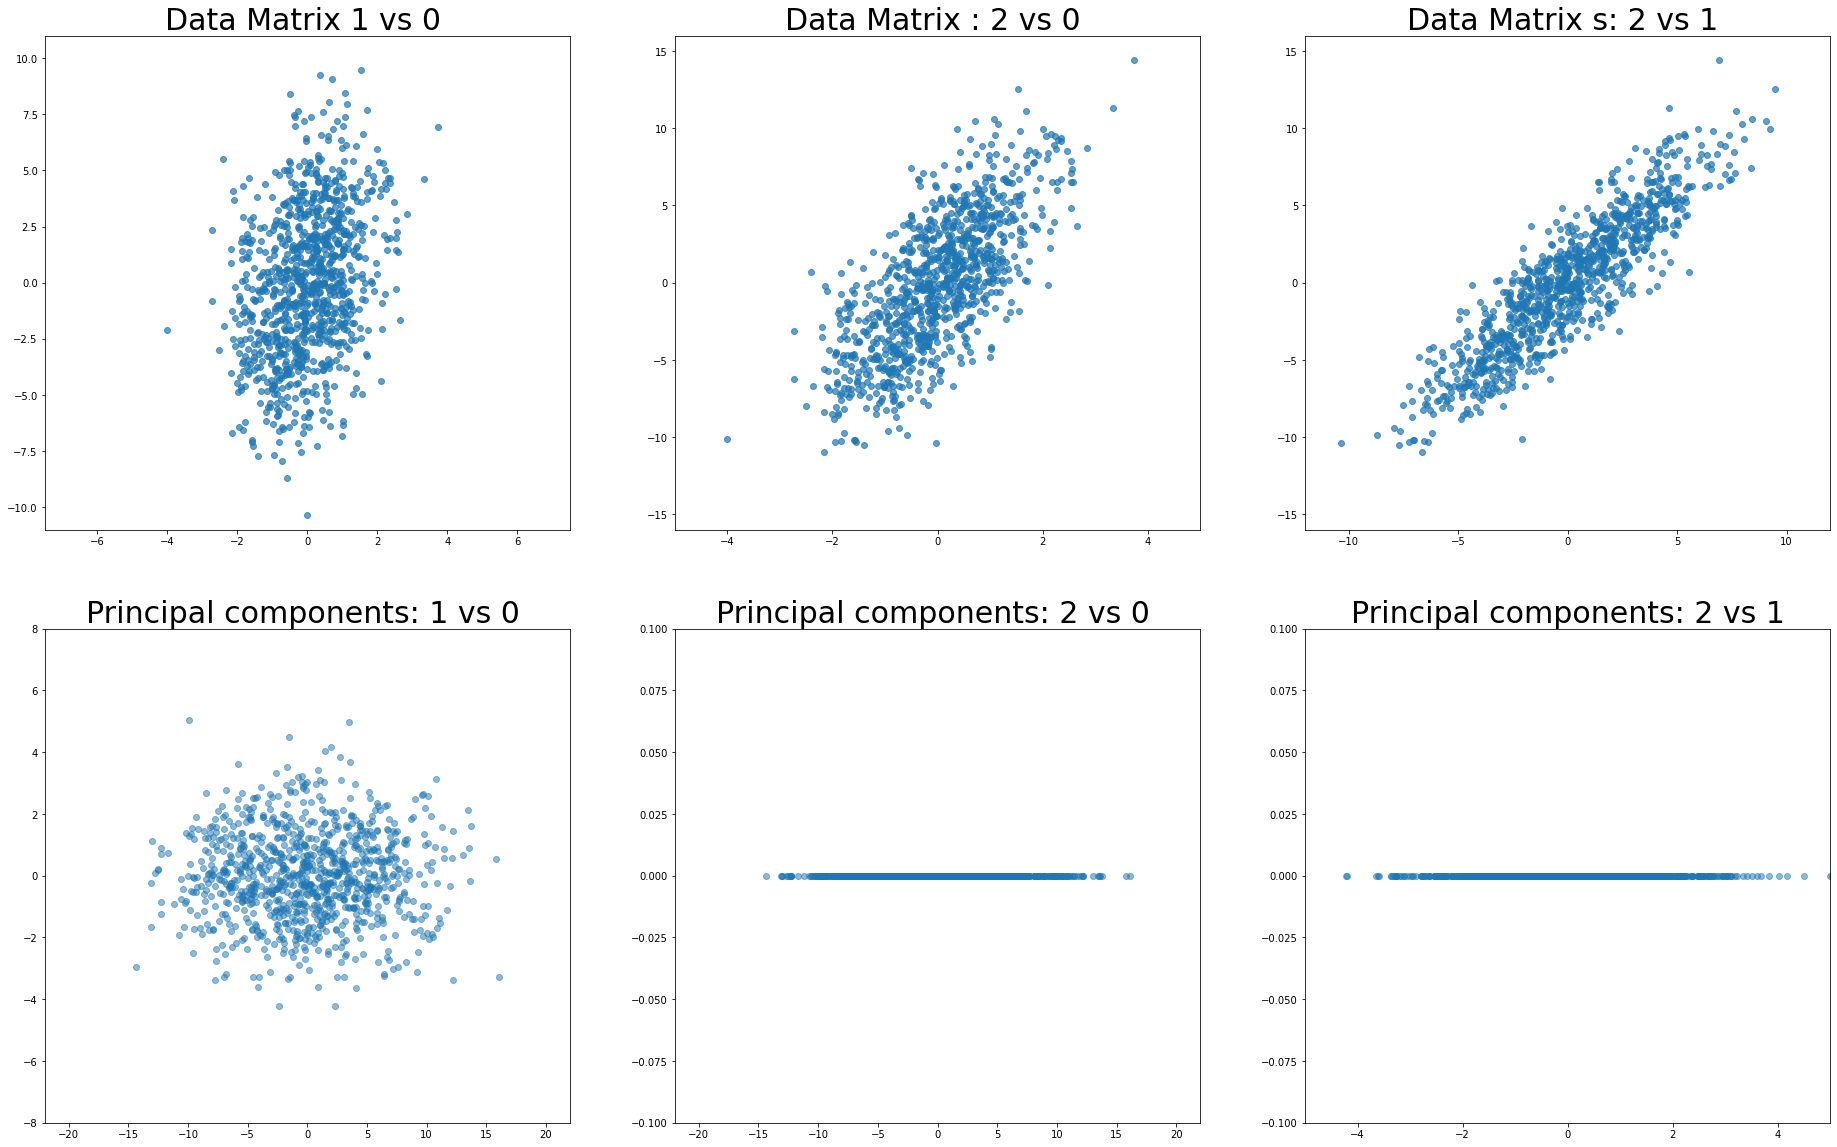

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(32, 20))


axs[0,0].scatter(D.iloc[:,0],D.iloc[:,1],alpha=0.7,label='set')
axs[0,0].set(xlim=(-7.5,7.5),ylim=(-11,11))
axs[0,0].set_title("Data Matrix 1 vs 0 ",fontsize=30)


axs[0,1].scatter(D.iloc[:,0],D.iloc[:,2],alpha=0.7,label='set')
axs[0,1].set(xlim=(-5,5),ylim=(-16,16))
axs[0,1].set_title("Data Matrix : 2 vs 0 ",fontsize=30)


axs[0,2].scatter(D.iloc[:,1],D.iloc[:,2],alpha=0.7,label='set') 
axs[0,2].set(xlim=(-12,12),ylim=(-16,16))
axs[0,2].set_title("Data Matrix s: 2 vs 1 ",fontsize=30)


axs[1,0].scatter(rotated_D[0,:],rotated_D[1,:],alpha=0.5,label='set')
axs[1,0].set(xlim=(-22,22),ylim=(-8,8))
axs[1,0].set_title("Principal components: 1 vs 0 ",fontsize=30)


axs[1,1].scatter(rotated_D[0,:],rotated_D[2,:],alpha=0.5,label='set')
axs[1,1].set(xlim=(-22,22),ylim=(-0.1,0.1))
axs[1,1].set_title("Principal components: 2 vs 0 ",fontsize=30)


axs[1,2].scatter(rotated_D[1,:],rotated_D[2,:],alpha=0.5,label='set') 
axs[1,2].set(xlim=(-5,5),ylim=(-0.1,0.1))
axs[1,2].set_title("Principal components: 2 vs 1",fontsize=30)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

# Define the new dataset

In [3]:

N = 1000

x_1 = np.random.normal(loc = 0, scale = 1, size = N)

x_2 = x_1 + np.random.normal(loc = 0, scale = 3, size = N)

x_3 = 2*x_1 + x_2
y = np.array( [np.random.normal(loc = 0, scale = 1/50, size = N) for i in range(10)])



x = np.array([x_1,x_2,x_3])
x = np.append(x,y,axis=0)
print(np.shape(x))
print(np.shape(y))

(13, 1000)
(10, 1000)


# PCA

In [4]:
covd   = np.cov(x)
l, V  = la.eig(covd)
Lambda = np.diag(l)
Lambda = Lambda/Lambda.trace()
l_Lam, V_Lam = la.eig(Lambda)

l_Lam = np.sort(l_Lam,)

variability = l_Lam[1] + l_Lam[2]
print(variability)

(2.4985404806477075e-05+0j)


# New data rescaling and rotation + Plot

In [5]:
l, V = la.eig(covd)
x_rot = np.dot(V.T,x)

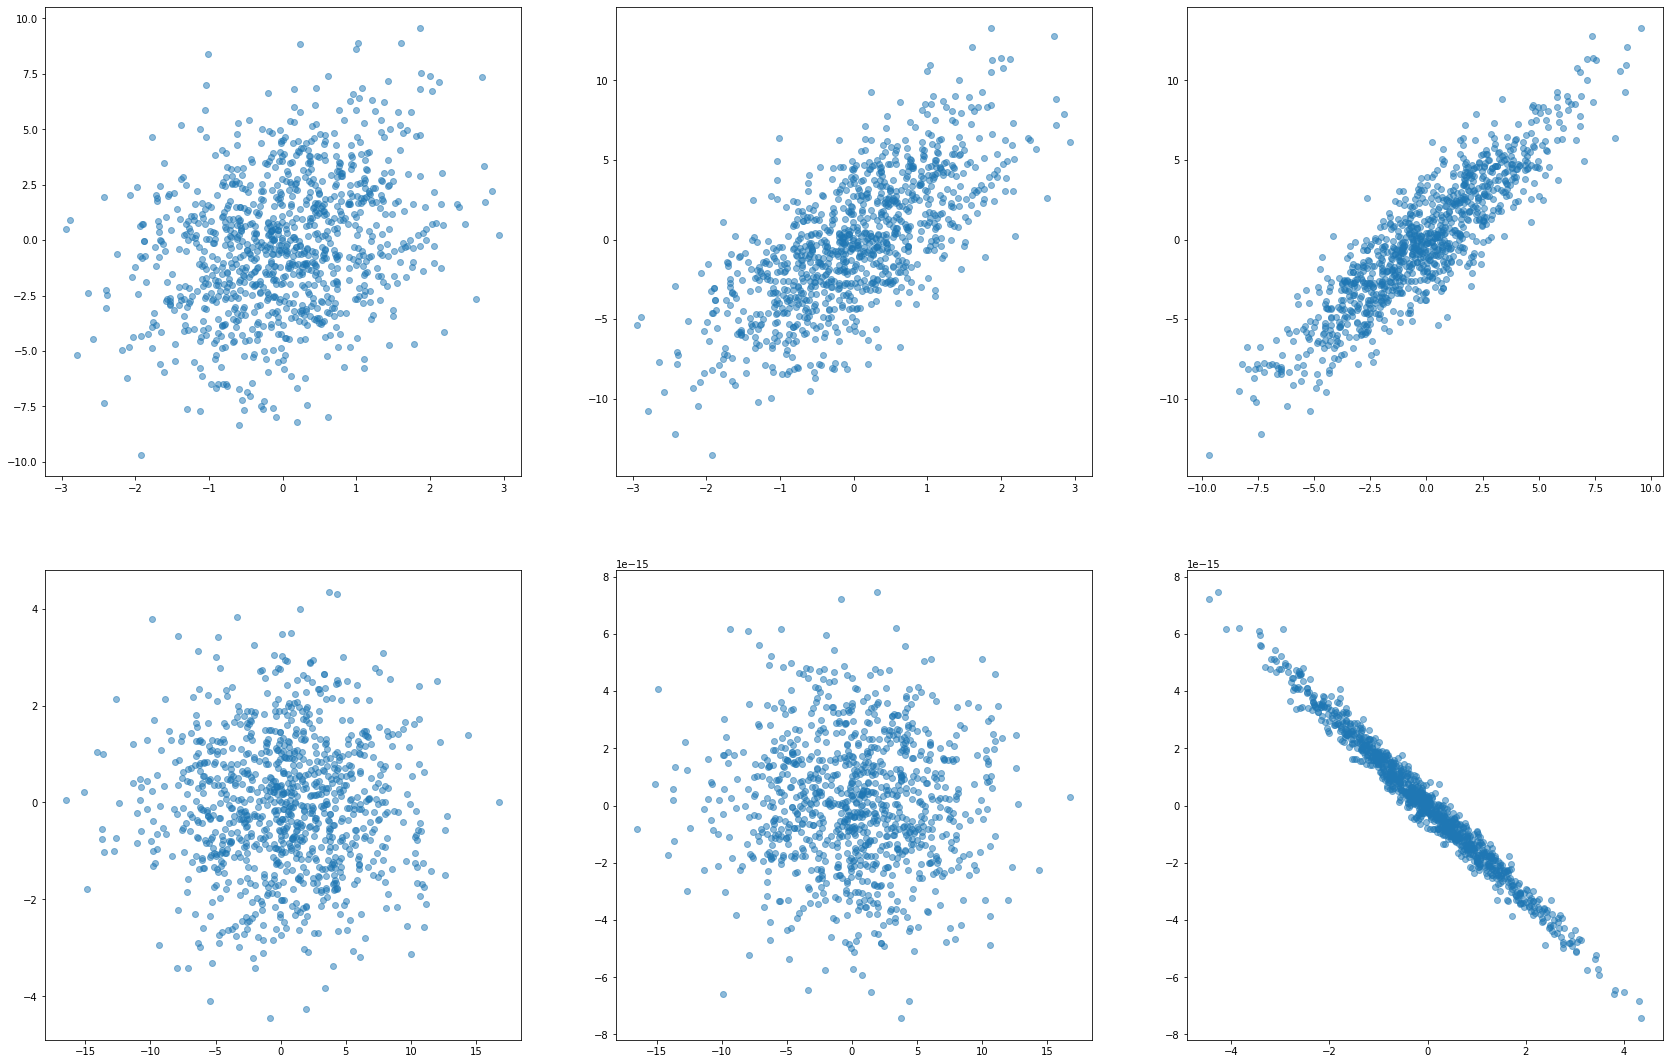

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(29, 19))


axs[0,0].scatter(x[0,:], x[1,:], alpha=0.5)

axs[0,1].scatter(x[0,:], x[2,:], alpha=0.5)

axs[0,2].scatter(x[1,:], x[2,:], alpha=0.5)

axs[1,0].scatter(x_rot[0,:], x_rot[1,:], alpha=0.5)

axs[1,1].scatter(x_rot[0,:], x_rot[2,:], alpha=0.5)


axs[1,2].scatter(x_rot[1,:], x_rot[2,:], alpha=0.5)



3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


# General Idea
## Description of the system 

I have n cameras in which record the oscillations of a spring alon the $x$ axis. To simulate this motion we use the equation of the harmonic oscillator:

$
x(t) = A\cos(\omega t + \varphi)
$

Let $A$ be equal to 10, $\omega = 0.1 \frac{1}{s}$ and $\varphi=0$. We discretize the time with the linspace function of numpy.
## Code part
For every camera make a change of reference system, in spherical coordinates.

$
\begin{cases}
x(\rho,\theta_i,\phi_i)= \rho \sin(\theta_i) \cos(\phi_i)\\
y(\rho,\theta_i,\phi_i)= \rho \sin(\theta_i) \sin(\phi_i)
\end{cases}
$

After this i create a numpy array in the even positions there are the $x$ of the $\frac{i}{2}-th$ camera, in the odd the $\frac{i-1}{2}-th$ camera.

$y$ is noise so use a normal distribution, with mean zero and std equal $0.1$.

In [78]:
# N -> Number of cameras
N      = 4
omega  = 0.1
varphi = 0
meany  = 0
stdy   = 0.1 
A      = 10
# Nt -> Number of the points of the discretize time 
Nt     = 1000
cameras = np.zeros((Nt,2*N+1))

time    = np.linspace(0,100,Nt)
x       = A*np.cos(omega*time+varphi)
y       = np.random.normal(meany,stdy,Nt)

# For phi and theta use the same linspace idea made for time
phi   = np.linspace(0,np.pi,N+1)
theta = np.linspace(0,2*np.pi,N+1)

for i in range(N):
    cameras[:,i*2]   = x*np.cos(theta[i])*np.sin(phi[i])
    cameras[:,i*2+1] = y*np.sin(theta[i])*np.sin(phi[i])


# PCA

In [79]:
covcam = np.cov(cameras)
U,spectrum , V = la.svd(covcam)
spectrum = spectrum**2/(Nt-1)
print(np.shape(spectrum))

(1000,)


# How much eigenvalues we have to use?

In [80]:
percetvar(spectrum,99)

% Total Variability explained by the principal components : 
0 : 100.0 %
Consider the first 1 eigenvalues


# Rotate the dataset and plot it

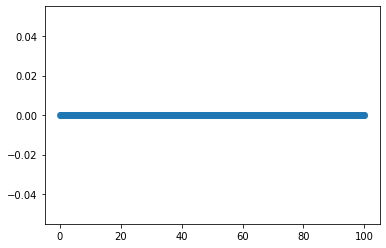

(1000, 9)


In [84]:
rotated_Dn = np.dot(V.T,cameras)
plt.scatter(time,rotated_Dn[:,1],alpha=0.5)#
plt.show()
print(np.shape(rotated_Dn))

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset